# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import torch.nn as nn
import time
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


4. It's Your Turn!
Now it's your turn to train your own agent to solve the environment! A few important notes:

When training the environment, set train_mode=True, so that the line for resetting the environment looks like the following:
env_info = env.reset(train_mode=True)[brain_name]
To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file! You can see the list of files in the workspace by clicking on Jupyter in the top left corner of the notebook.
In this coding environment, you will not be able to watch the agents while they are training. However, after training the agents, you can download the saved model weights to watch the agents on your own machine!

In [7]:
def ddpg(n_episodes=3000):
    scores_deque = deque(maxlen=100)
    scores = []
    average_score=[]
    max_score = 0
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        while True:
            actions = agent.act(states)                        
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations         
            rewards = env_info.rewards                         
            dones = env_info.local_done                        
            agent.step(states, actions, rewards, next_states, dones)
            score += rewards                                   
            states = next_states                               
            if np.any(dones):                                  
                break

        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        average_score.append(np.mean(scores_deque))
        
        print('\rEpisode {}\tAverage Score: {:.3f}\tScore: {:.3f}'.format(i_episode, np.mean(scores_deque), np.mean(score)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
            max_score = np.mean(scores_deque)
            
        # save agent if 100 perfomance is better, that max_score
        if max_score < np.mean(scores_deque):
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            max_score = np.mean(scores_deque)
            
    return scores, average_score

In [8]:
scores, scores_window = ddpg()

Episode 100	Average Score: -0.000	Score: -0.005
Episode 200	Average Score: -0.005	Score: -0.005
Episode 300	Average Score: -0.005	Score: -0.005
Episode 400	Average Score: -0.004	Score: -0.005
Episode 500	Average Score: -0.002	Score: -0.005
Episode 600	Average Score: -0.002	Score: -0.005
Episode 700	Average Score: 0.002	Score: -0.0055
Episode 800	Average Score: 0.006	Score: 0.0455
Episode 900	Average Score: 0.008	Score: -0.005
Episode 1000	Average Score: 0.028	Score: 0.195
Episode 1100	Average Score: 0.045	Score: -0.005
Episode 1200	Average Score: 0.038	Score: 0.0455
Episode 1300	Average Score: 0.033	Score: 0.0455
Episode 1400	Average Score: 0.032	Score: -0.005
Episode 1500	Average Score: 0.045	Score: 0.0455
Episode 1600	Average Score: 0.063	Score: 0.0455
Episode 1700	Average Score: 0.058	Score: 0.0455
Episode 1800	Average Score: 0.066	Score: 0.0455
Episode 1900	Average Score: 0.098	Score: 0.1955
Episode 2000	Average Score: 0.097	Score: 0.0455
Episode 2100	Average Score: 0.183	Score: 0.

When finished, you can close the environment.

In [9]:
env.close()

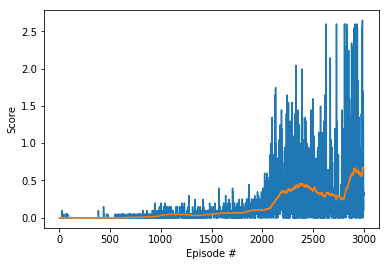

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(scores_window)+1), scores_window)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('rewards_per_episode.png')
plt.show()